In [125]:
from FirstModelOOP import FirstModel
from brian2 import*
from functions import*


%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


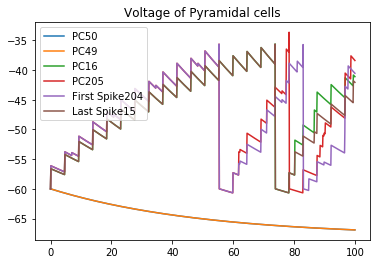

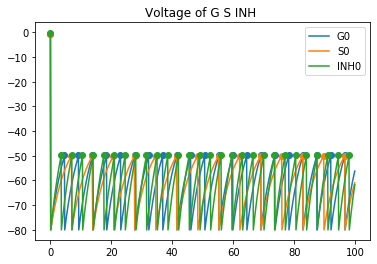

WARNING    c:\users\victoria\anaconda3\envs\aml\envs\neuro-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
 [py.warnings]
WARNING    c:\users\victoria\anaconda3\envs\aml\envs\neuro-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
 [py.warnings]


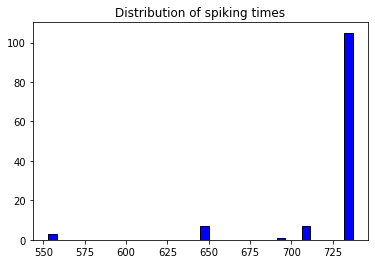

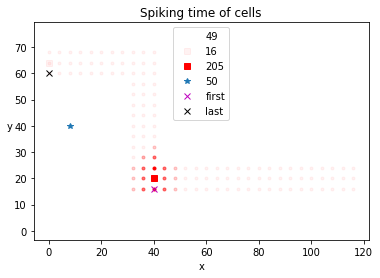

In [194]:
start_scope()

params = {}

fm1 = FirstModel(params)


fm1.run(duration= 100 * ms, show_PC=True, show_other=True)

plot_spike_times(fm1)

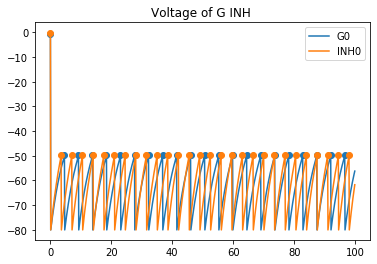

[0]


In [167]:
plot_voltages_other_types(fm1,['G', 'INH'])
spiking_times, argmin_, argmax_ = spiking_times_fun(fm1, -36.1, type_ = 'G')
print(spiking_times)

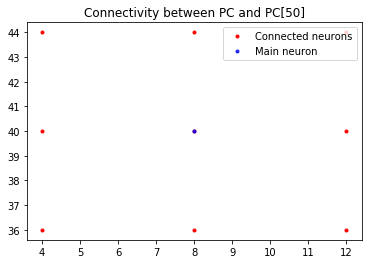

In [5]:
#plot_distance(PC, 0, rows, cols)

plot_connectivity(fm1, [fm1.SPC], "PC[" +str(50)+ "]" , 50)
show()

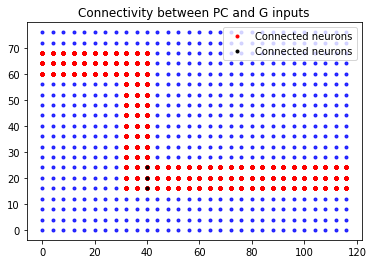

In [80]:
plot_connectivity(fm1, [fm1.SPCG, fm1.SS], "G inputs")
savefig('PC_Gconnectivity.png')
show()

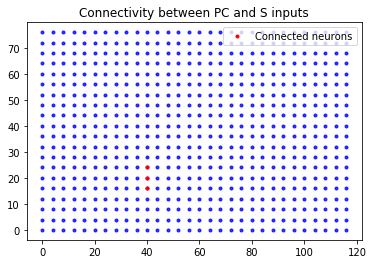

In [16]:
plot_connectivity(fm1, [fm1.SS], "S inputs")
savefig('PC_Sconnectivity.png')
show()

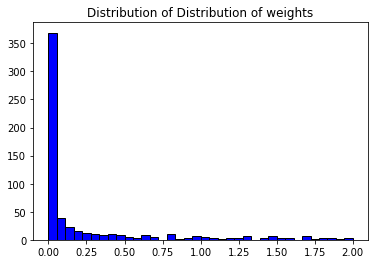

In [13]:
n = fm1.p['rows'] * fm1.p['cols']
list_ = []
for i in range(n):
    list_.append(2*exp(-((fm1.PC.x[15]-fm1.PC.x[i])**2+(fm1.PC.y[15] - fm1.PC.y[i])**2)/(2*15*metre)**2))

plot_distrib(list_, "Distribution of weights")

In [ ]:

n = fm1.p['rows'] * fm1.p['cols']
list1 = []
list2 = []
for j in range(n):
    list1.append(2 -2*exp(-(abs(fm1.PC.x[50]-fm1.PC.x[j])+abs(fm1.PC.y[50] - fm1.PC.y[j]))/((2*15*meter))))
    list2.append((((fm1.PC.x[50]-fm1.PC.x[j])**2+(fm1.PC.y[50] - fm1.PC.y[j])**2)/((2*15*meter)**2))/10)

plot_distrib(list1, "minus distance delay (bad)")
plot_distrib(list2, "plus distance delay (good)")

## Comment 
Here cheks the neurons are well created, and connected by the synapses.

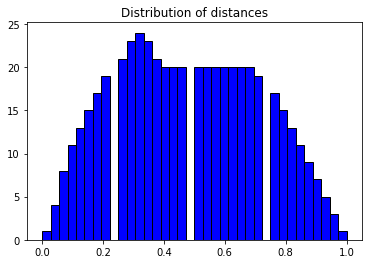

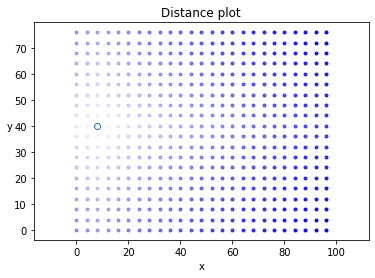

In [41]:
neuron_idx = 50
plot_distance(fm1)

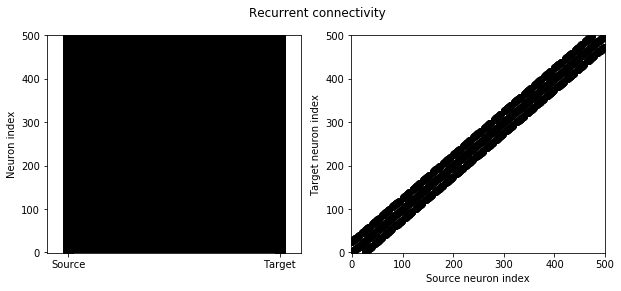

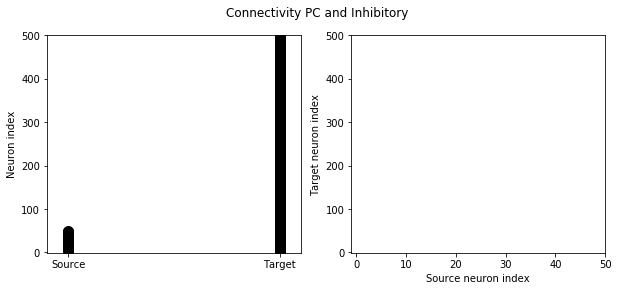

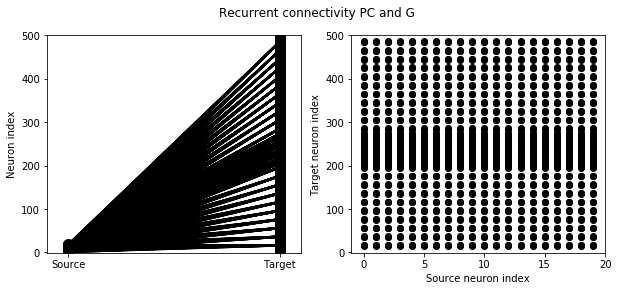

In [13]:
visualise_connectivity(fm1.SPC, "Recurrent connectivity")
visualise_connectivity(fm1.SPCINH, "Connectivity PC and Inhibitory")
visualise_connectivity(fm1.SPCG, "Recurrent connectivity PC and G")


In [ ]:
for i in range(3):
    print('For model ',i)
    start_scope()
    p = {
            # Tonic Neurons
            "v_reset_tonic" : -80 + i*30,        # Leak potential
            "v_leak_tonic" : -80,         # Reset potential
            "v_thr_tonic" : -50,          # Spiking threshold
            'tau_dyn_tonic': 5 * ms,      # Leak timescale
            "tau_refr_tonic" : 2 * ms,    # Refractory period
            "gi_tonic" : 1,               # ???

            # External Input Neurons
            "v_reset_ext": -80 + i*30,  # Leak potential
            "v_leak_ext": -80,  # Reset potential
            "v_thr_ext": -50,  # Spiking threshold
            'tau_dyn_ext': 5 * ms,  # Leak timescale
            "tau_refr_ext": 2 * ms,  # Refractory period
            "gi_ext": 1,  # ???
    }
    fm1 = FirstModel(p)
    fm1.run(show_other=True)